In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
ipl=pd.read_csv('T20Is - Batting.csv')
pd.set_option('display.max_columns',200)


In [152]:
ipl.head(2)


,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Boundary Fours,Boundary Sixes,Country,Player Count,1000+ Runs Scored,25+ Batting Avg,120+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009.0,2018.0,72,70,14,1678,85*,85,29.96,1268,132.33,0,9,3,124,76,England,1,1,1,1
1,AD Hales (2011-2018),2011-2018,2011.0,2018.0,52,52,6,1456,116*,116,31.65,1068,136.32,1,7,4,158,45,England,1,1,1,1


In [153]:
mask1=ipl['Batting Avg']!='-'
mask2=ipl['Batting Strike Rate']!='-'
ipl=ipl[mask1 & mask2]

In [154]:
ipl['Batting Strike Rate']=ipl['Batting Strike Rate'].astype('float')
ipl['Batting Avg']=ipl['Batting Avg'].astype('float')
ipl['Innings Batted']=ipl['Innings Batted'].astype('int')

In [155]:
mask3=ipl['Batting Avg']>10
mask4=ipl['Batting Strike Rate']>100
mask5=ipl['Innings Batted']>10
ipl=ipl[mask3&mask4&mask4]

In [156]:
ipl=ipl[['Batting Avg','Batting Strike Rate']]
ipl.head()

,Batting Avg,Batting Strike Rate
0,29.96,132.33
1,31.65,136.32
2,37.93,141.51
3,25.45,134.29
4,18.97,137.00


In [157]:
ipl.shape

(441, 2)

In [158]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 987
Data columns (total 2 columns):
Batting Avg            441 non-null float64
Batting Strike Rate    441 non-null float64
dtypes: float64(2)
memory usage: 10.3 KB


In [159]:

ipl.shape

(441, 2)

In [160]:
X=ipl.iloc[:,:].values
X.shape

(441, 2)

In [161]:
#we first need to know how many clustrers do we need
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

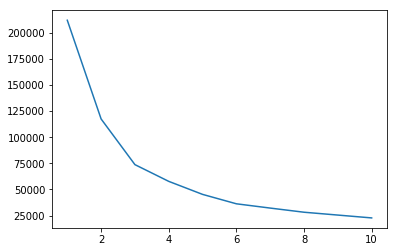

In [162]:
plt.plot(range(1,11),wcss)


In [163]:
km=KMeans(n_clusters=6)
y_means=km.fit_predict(X)

In [164]:
y_means

array([4, 2, 4, 2, 2, 4, 0, 0, 2, 3, 2, 0, 0, 4, 0, 2, 3, 0, 2, 3, 0, 4,
       0, 0, 0, 0, 2, 0, 0, 4, 2, 0, 0, 3, 3, 3, 1, 3, 4, 1, 0, 0, 5, 0,
       2, 2, 1, 1, 4, 0, 4, 3, 2, 0, 3, 2, 1, 4, 2, 3, 2, 3, 2, 4, 0, 3,
       4, 2, 4, 4, 0, 1, 3, 3, 2, 2, 2, 2, 1, 0, 1, 2, 5, 2, 3, 2, 3, 5,
       4, 2, 4, 4, 2, 4, 0, 4, 2, 4, 0, 2, 2, 3, 2, 4, 0, 4, 0, 0, 2, 3,
       3, 0, 1, 1, 0, 0, 3, 3, 5, 3, 0, 0, 1, 5, 3, 0, 3, 3, 2, 0, 0, 0,
       2, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 4, 0, 0, 0, 0, 0, 4, 3, 3, 3,
       0, 3, 4, 4, 0, 0, 1, 0, 2, 0, 0, 2, 3, 2, 3, 0, 3, 1, 0, 3, 2, 3,
       2, 3, 2, 0, 2, 0, 3, 4, 0, 0, 2, 3, 3, 3, 0, 3, 2, 2, 0, 3, 0, 4,
       2, 2, 4, 2, 0, 0, 4, 4, 2, 3, 2, 0, 2, 0, 0, 3, 3, 0, 0, 4, 3, 3,
       0, 4, 3, 0, 2, 2, 0, 0, 3, 0, 2, 0, 3, 4, 4, 3, 2, 0, 0, 2, 3, 2,
       3, 3, 0, 3, 3, 2, 4, 3, 0, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1, 1, 1, 3,
       0, 4, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0, 3, 3, 2, 2, 0, 0, 3, 0, 2, 0,
       3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 3, 2, 3, 0, 3,

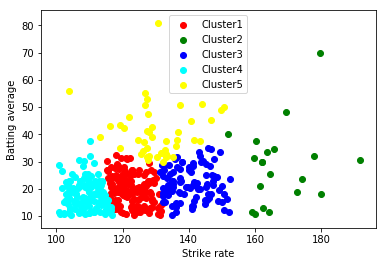

In [166]:
plt.scatter(X[y_means==0,1],X[y_means==0,0],color='red',label='Cluster1')
plt.scatter(X[y_means==1,1],X[y_means==1,0],color='green',label='Cluster2')
plt.scatter(X[y_means==2,1],X[y_means==2,0],color='blue',label='Cluster3')
plt.scatter(X[y_means==3,1],X[y_means==3,0],color='cyan',label='Cluster4')
plt.scatter(X[y_means==4,1],X[y_means==4,0],color='yellow',label='Cluster5')
plt.xlabel('Strike rate')
plt.ylabel('Batting average')
plt.legend()